In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

In [27]:
data = pd.read_csv("Terrorism_data.csv", encoding ='latin1') 
data.head() 

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1.0,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4.0,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [28]:
data.shape

(69503, 135)

In [29]:
data.columns.values 

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [30]:
data.rename(columns={'iyear':'Year', 'imonth':'Month', 'iday':'day', 'gname':'Group','country_txt':'Country', 'region_txt':'Region', 'provstate':'State',            
'city':'City','latitude':'latitude','longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype', 
                     
'targtype1_txt' :'Targettype', 'weaptype1_txt':'Weapon', 'nkill':'kill', 'nwound':'Wound'}, inplace=True) 

In [31]:
data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill','Wound',
            'target1','summary','Group','Targettype','Weapon','motive']] 

In [32]:
data.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [33]:
data.shape 

(69503, 18)

In [34]:
data.isnull().sum()

Year              0
Month             0
day               0
Country           0
State           412
Region            1
City              1
latitude       3713
longitude      3714
Attacktype        1
kill           6136
Wound          8312
target1         469
summary       66130
Group             1
Targettype        1
Weapon            1
motive        66426
dtype: int64

In [35]:
data['Wound'] = data['Wound'].fillna(0)
data['kill'] = data['kill'].fillna(0)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69503 entries, 0 to 69502
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        69503 non-null  int64  
 1   Month       69503 non-null  int64  
 2   day         69503 non-null  int64  
 3   Country     69503 non-null  object 
 4   State       69091 non-null  object 
 5   Region      69502 non-null  object 
 6   City        69502 non-null  object 
 7   latitude    65790 non-null  float64
 8   longitude   65789 non-null  float64
 9   Attacktype  69502 non-null  object 
 10  kill        69503 non-null  float64
 11  Wound       69503 non-null  float64
 12  target1     69034 non-null  object 
 13  summary     3373 non-null   object 
 14  Group       69502 non-null  object 
 15  Targettype  69502 non-null  object 
 16  Weapon      69502 non-null  object 
 17  motive      3077 non-null   object 
dtypes: float64(4), int64(3), object(11)
memory usage: 9.5+ MB


In [37]:
data.describe()

,Year,Month,day,latitude,longitude,kill,Wound
count,69503.000000,69503.000000,69503.000000,65790.000000,6.578900e+04,69503.000000,69503.000000
mean,1987.192668,6.449276,15.378919,18.483214,-1.322065e+03,2.011165,1.936103
std,6.684525,3.386507,8.805010,24.267536,3.360157e+05,9.656197,28.536535
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1982.000000,4.000000,8.000000,6.053240,-7.556477e+01,0.000000,0.000000
50%,1988.000000,6.000000,15.000000,15.587991,-2.921819e+00,0.000000,0.000000
75%,1992.000000,9.000000,23.000000,38.395649,3.509416e+01,1.000000,0.000000
max,1999.000000,12.000000,31.000000,74.633553,1.784419e+02,1180.000000,5500.000000


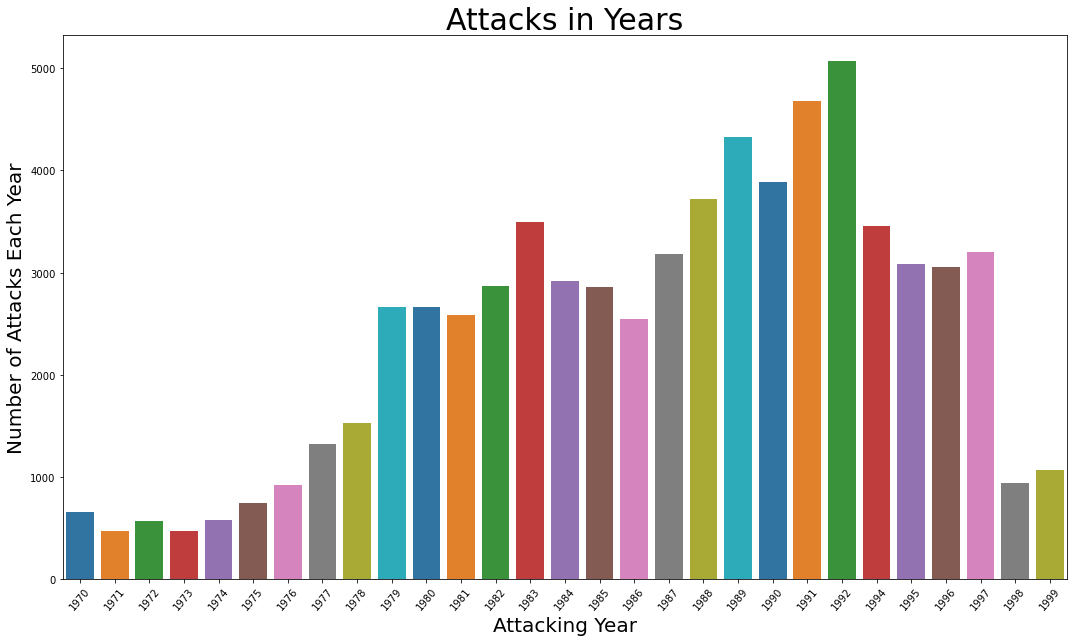

In [38]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x =year, y=years_count, palette = "tab10")
plt.xticks(rotation =50)
plt.xlabel('Attacking Year', fontsize=20)
plt.ylabel('Number of Attacks Each Year', fontsize=20)
plt.title('Attacks in Years', fontsize=30)
plt.show()           

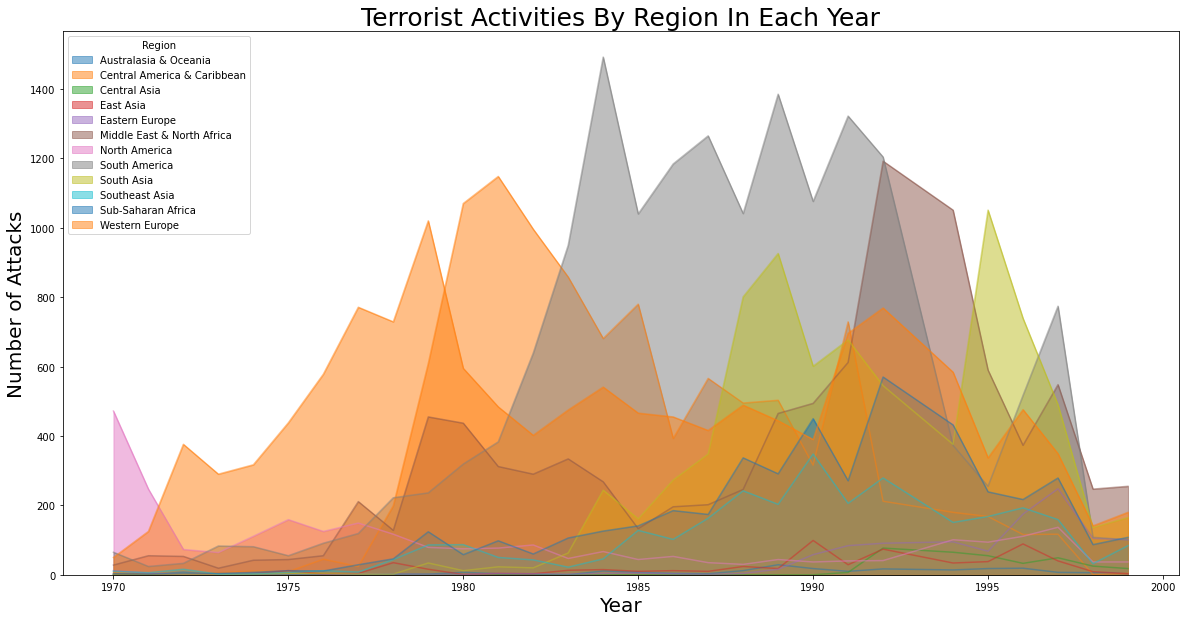

In [39]:
pd.crosstab(data.Year, data. Region).plot(kind='area', stacked=False, figsize=(20,10))
plt.title('Terrorist Activities By Region In Each Year', fontsize=25)
plt.ylabel('Number of Attacks', fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.show() 

In [40]:
attack = data.Country.value_counts()[:10]
attack 

Colombia          6173
Peru              6023
El Salvador       5320
United Kingdom    4166
India             3019
Spain             2814
Turkey            2470
United States     2343
Chile             2267
France            2229
Name: Country, dtype: int64

In [41]:
data.Group.value_counts()[1:10] 

Shining Path (SL)                                   4501
Farabundo Marti National Liberation Front (FMLN)    3351
Irish Republican Army (IRA)                         2656
Basque Fatherland and Freedom (ETA)                 1787
Revolutionary Armed Forces of Colombia (FARC)       1238
National Liberation Army of Colombia (ELN)          1139
Palestinians                                        1102
Kurdistan Workers' Party (PKK)                      1072
Liberation Tigers of Tamil Eelam (LTTE)             1018
Name: Group, dtype: int64

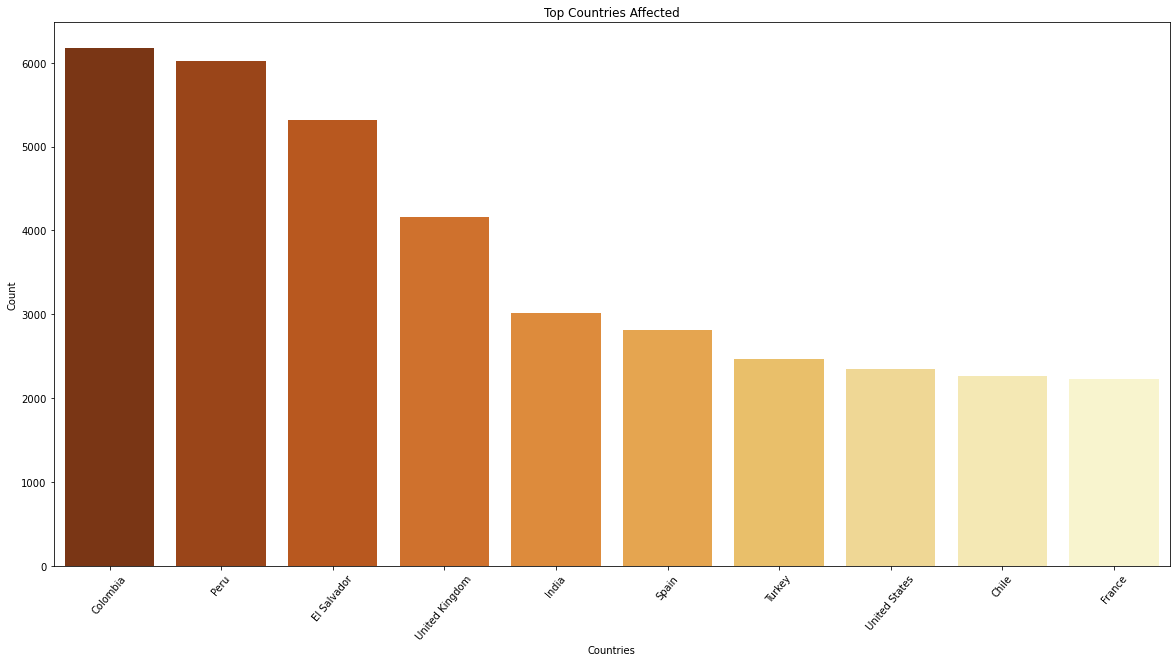

In [42]:
plt.subplots(figsize=(20,10)) 
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette='YlOrBr_r')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=50)       
plt.show() 

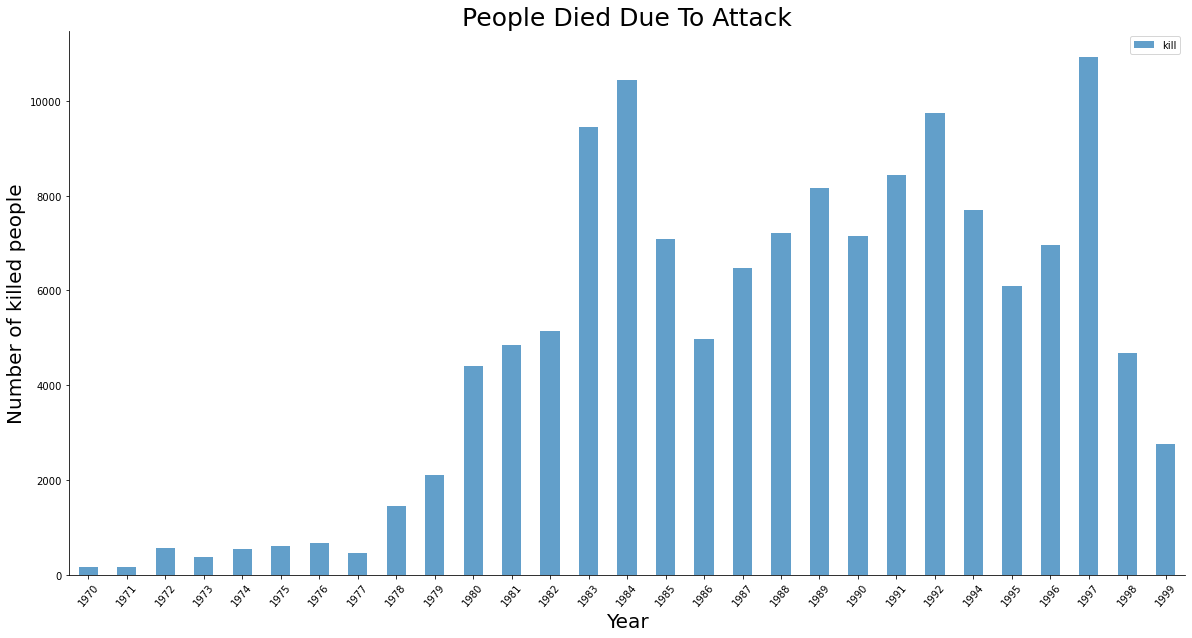

In [43]:
df= data[['Year', 'kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
df.plot(kind='bar', alpha=0.7, ax=ax4)
plt.xticks(rotation=50)
plt.title("People Died Due To Attack", fontsize=25)
plt.ylabel('Number of killed people', fontsize=20)
plt.xlabel('Year',fontsize=20)
top_side=ax4.spines["top"]
top_side.set_visible(False)
right_side = ax4.spines["right"]
right_side.set_visible(False) 

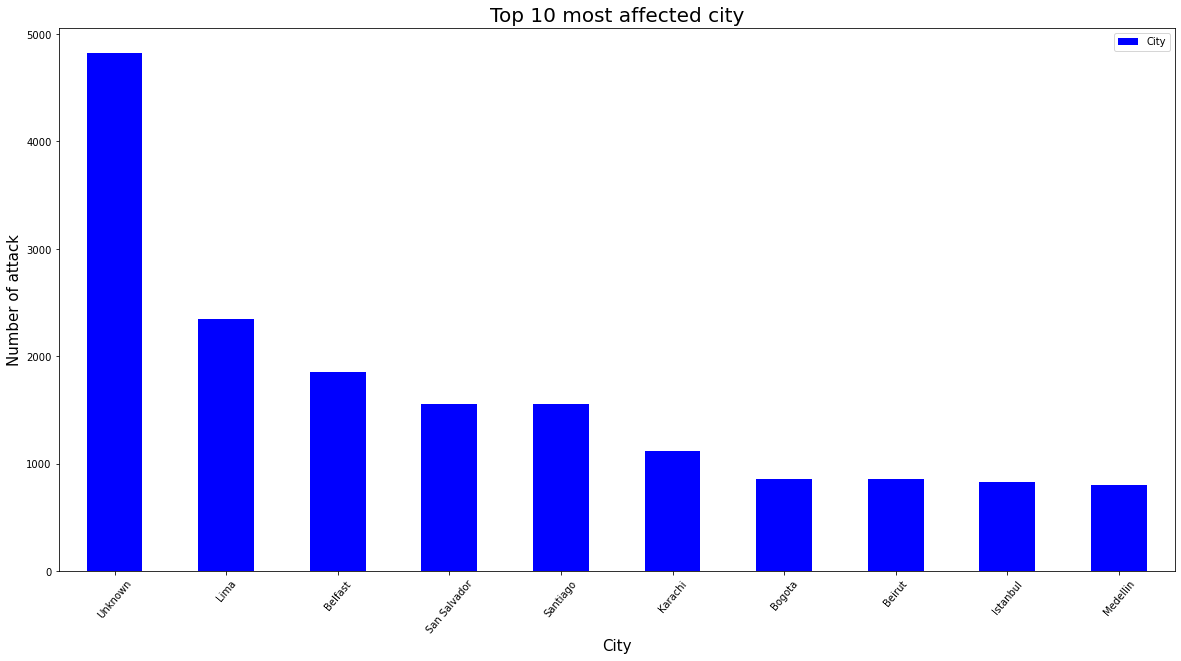

In [44]:

data['City'].value_counts().to_frame().sort_values('City', axis=0,ascending =False).head(10).plot(kind='bar',figsize=(20,10)
,color='blue')
plt.xticks(rotation=50)
plt.xlabel("City",fontsize=15)
plt.ylabel("Number of attack",fontsize=15)
plt.title("Top 10 most affected city", fontsize=20)
plt.show() 

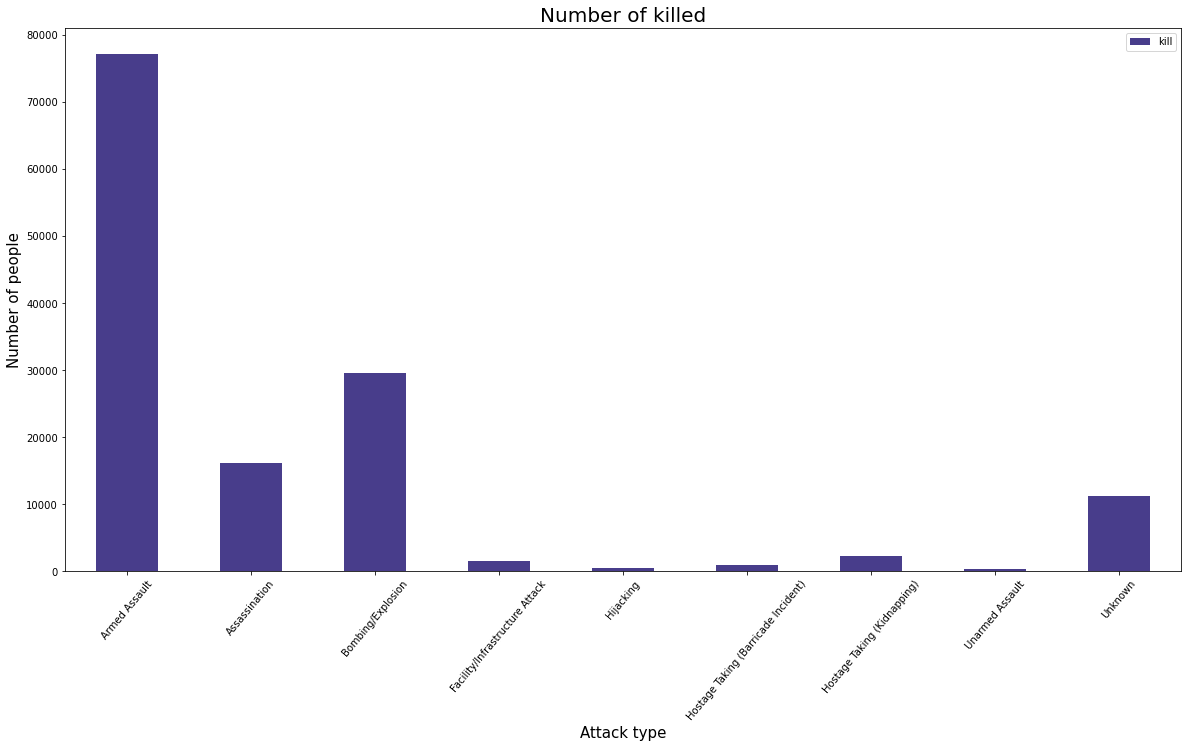

In [45]:
data[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10)
,color=['darkslateblue'])
plt.xticks(rotation=50)
plt.xlabel("Attack type",fontsize=15)
plt.ylabel("Number of people",fontsize=15)
plt.title("Number of killed", fontsize=20)
plt.show() 

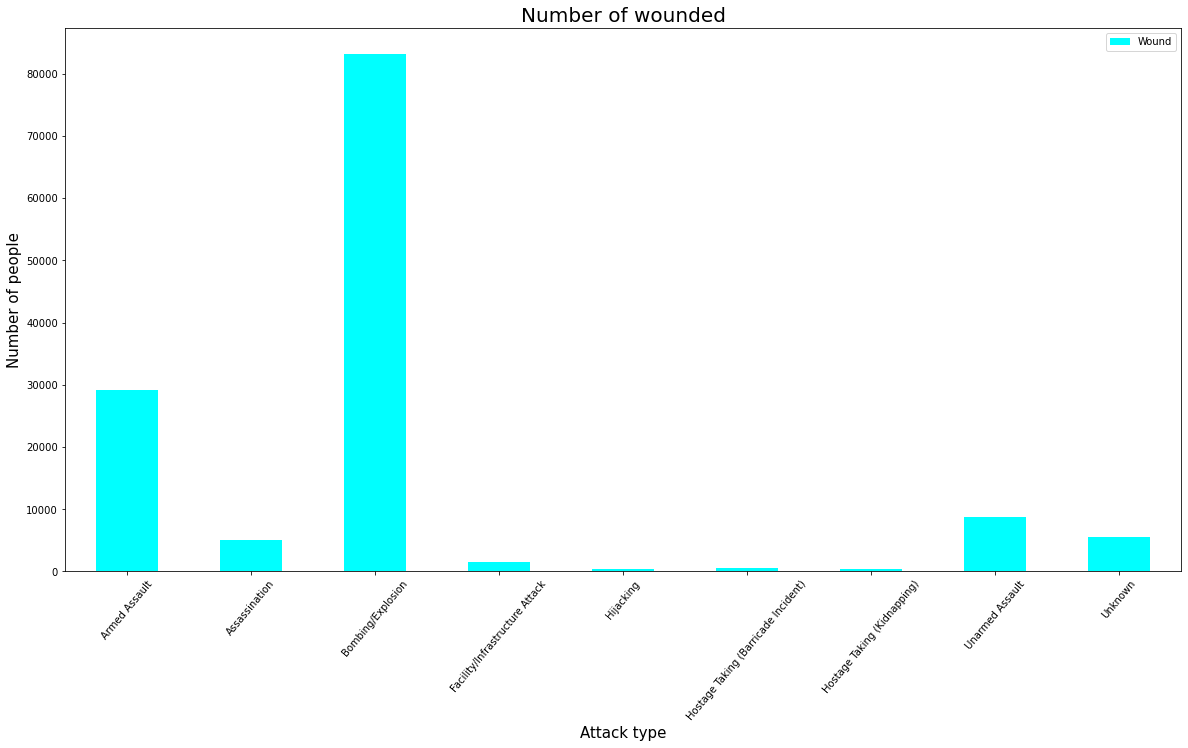

In [46]:
data[['Attacktype','Wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10)
,color=['cyan'])
plt.xticks(rotation=50)
plt.xlabel("Attack type",fontsize=15)
plt.ylabel("Number of people",fontsize=15)
plt.title("Number of wounded", fontsize=20)
plt.show() 

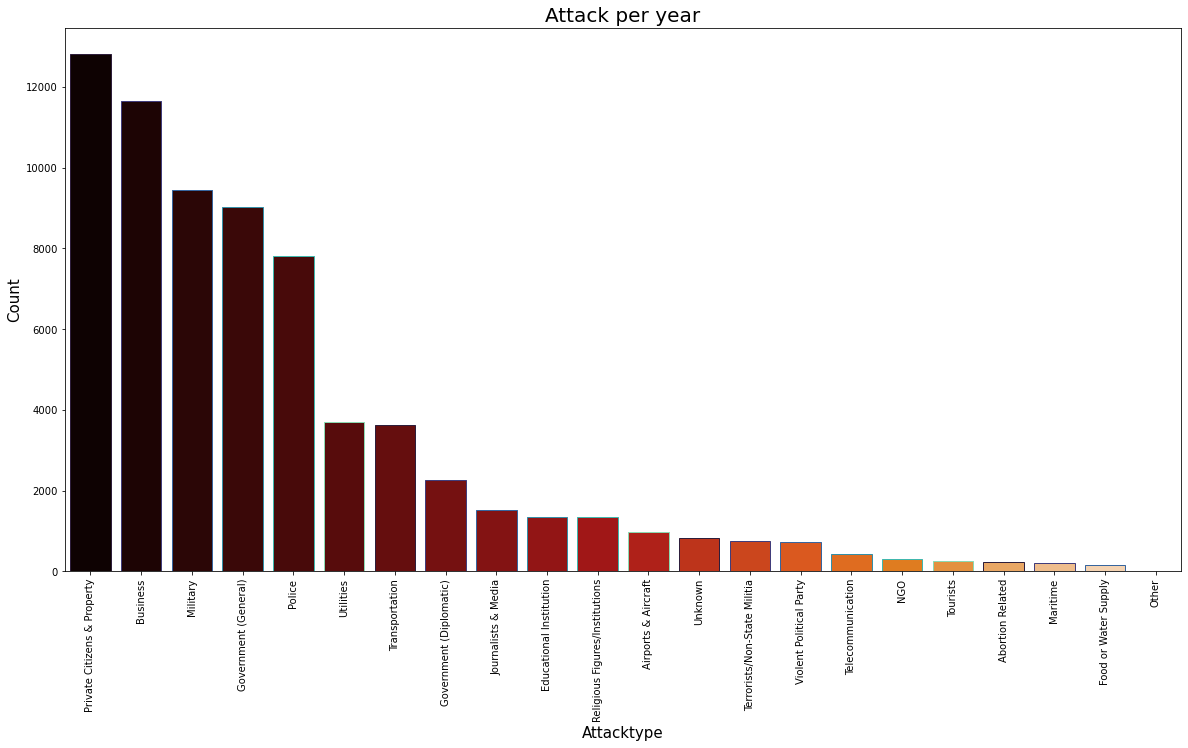

In [47]:
plt.subplots(figsize=(20,10)) 
sns.countplot(data['Targettype'],order=data['Targettype'].value_counts().index,palette="gist_heat",edgecolor=sns.color_palette
              ("mako"));
plt.title('Attack per year', fontsize=20)
plt.xlabel('Attacktype', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation=90)       
plt.show() 

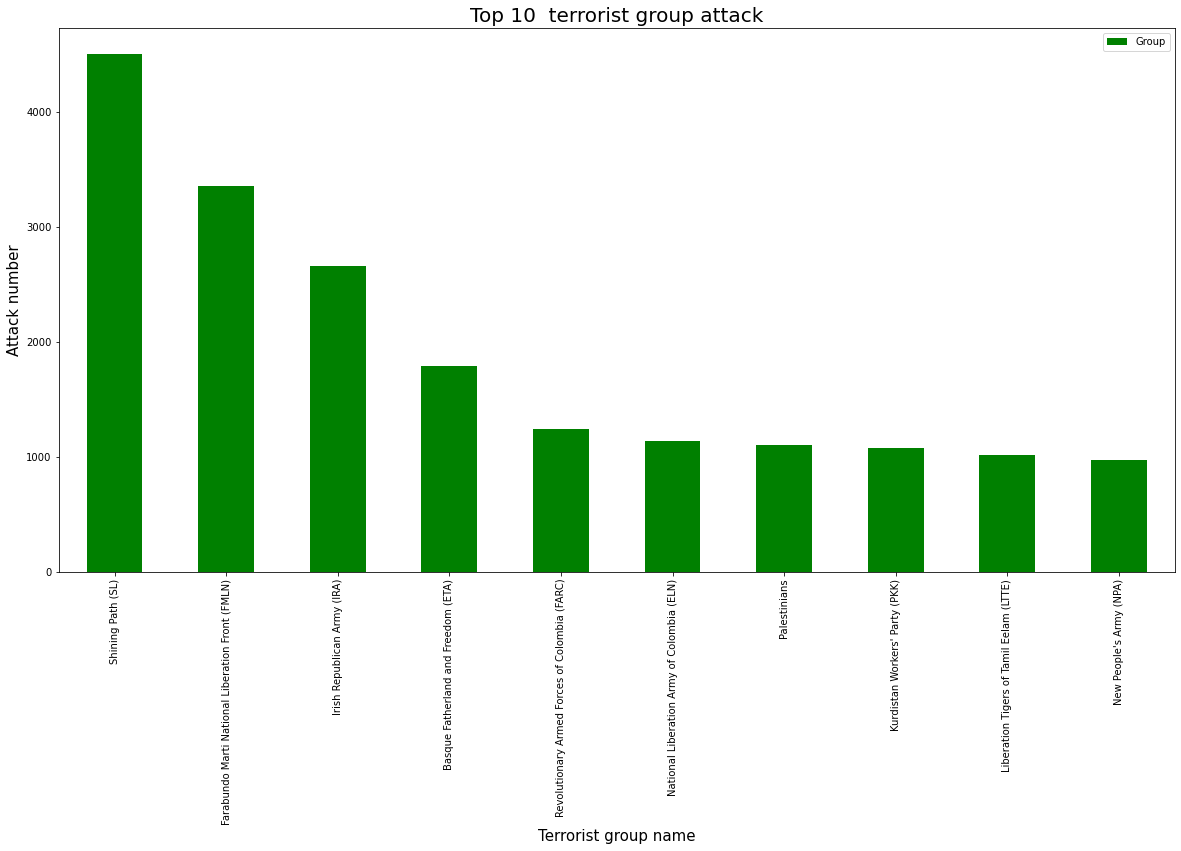

In [48]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',figsize=(20,10)
,color='green')
plt.xlabel("Terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.title("Top 10  terrorist group attack", fontsize=20)
plt.show() 

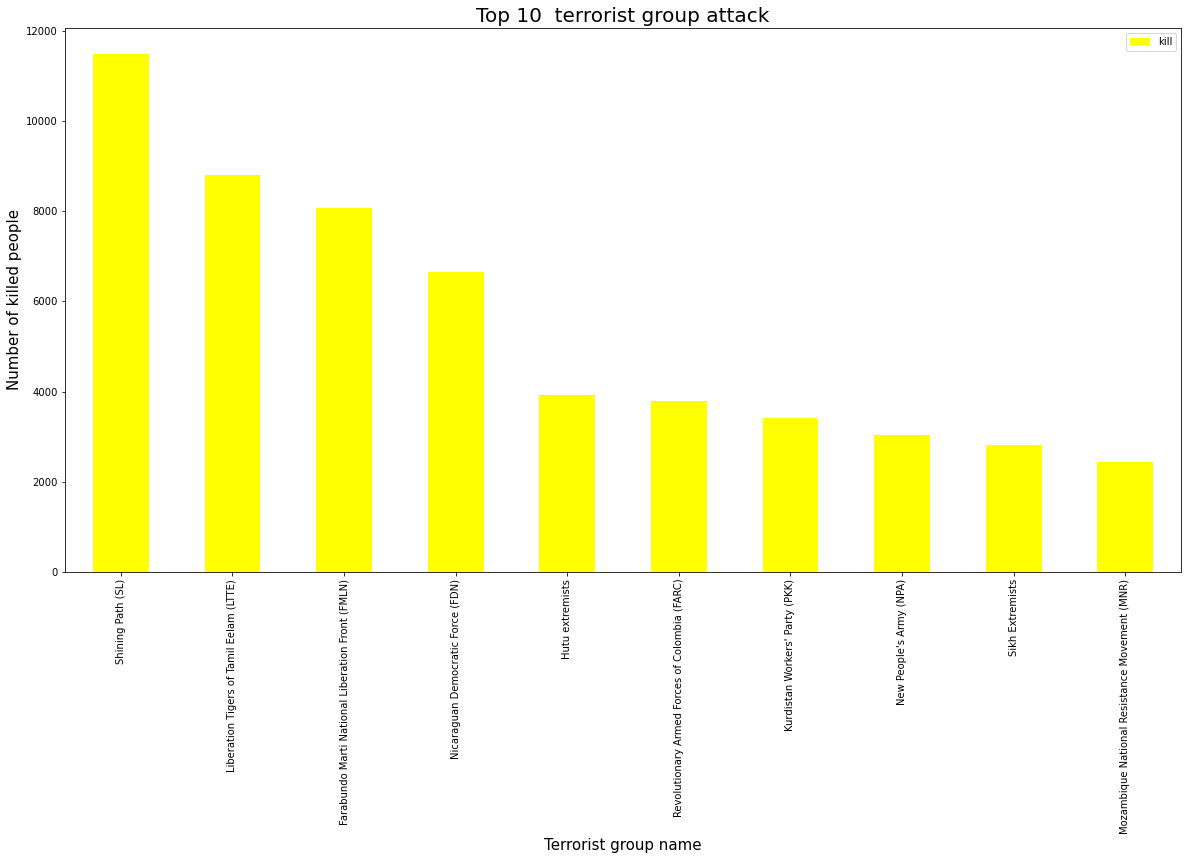

In [49]:
data[['Group','kill']].groupby(['Group'],axis=0).sum().drop('Unknown').sort_values('kill',ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='yellow')

plt.title("Top 10  terrorist group attack", fontsize=20)
plt.xlabel("Terrorist group name",fontsize=15)
plt.ylabel("Number of killed people",fontsize=15)
plt.show() 

In [50]:
df=data[['Group', 'Country', 'kill']]
df=df.groupby(['Group', 'Country'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df 

,Group,Country,kill
0,Shining Path (SL),Peru,11483.0
1,Liberation Tigers of Tamil Eelam (LTTE),Sri Lanka,8780.0
2,Farabundo Marti National Liberation Front (FMLN),El Salvador,8019.0
3,Nicaraguan Democratic Force (FDN),Nicaragua,6630.0
4,Revolutionary Armed Forces of Colombia (FARC),Colombia,3778.0
5,Kurdistan Workers' Party (PKK),Turkey,3337.0
6,New People's Army (NPA),Philippines,3025.0
7,Sikh Extremists,India,2476.0
8,Hutu extremists,Rwanda,2451.0
9,Mozambique National Resistance Movement (MNR),Mozambique,2357.0


In [52]:
kill=data.loc[:,'kill']
print('Number of people killed by terror attack:' , int(sum(kill.dropna())))


Number of people killed by terror attack: 139782


In [53]:
typeKill=data.pivot_table(columns='Attacktype',values='kill',aggfunc='sum')
typeKill 

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,77185.0,16223.0,29556.0,1509.0,471.0,967.0,2287.0,336.0,11248.0


In [55]:
countryKill=data.pivot_table(columns='Country',values='kill',aggfunc='sum')
countryKill  

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
kill,407.0,37.0,7291.0,0.0,1935.0,0.0,490.0,21.0,13.0,27.0,...,1.0,0.0,567.0,97.0,1.0,69.0,106.0,324.0,70.0,136.0
